# Convolution Layers

Convolution layers can be added using the Conv2D class's objects and then pooling layer can be added to reduce the size of the output using the MaxPool2D class's objects.

These layers are added similarly to how the Dense layers were added but before the Flatten layer.

## Adding Convolutions 

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

**NOTE: Here we have to convert/reshape a 28x28 matrix into a 28x28x1 matrix for using the data in a Conv2D layer. It wont accept it as 28x28**

In [5]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4373 - accuracy: 0.8406
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2929 - accuracy: 0.8928
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2483 - accuracy: 0.9082
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2165 - accuracy: 0.9198
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1902 - accuracy: 0.9286
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1662 - accuracy: 0.9380
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1466 - accuracy: 0.9451
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1271 - accuracy: 0.9514
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1130 - accuracy: 0.9573
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3236 - accuracy: 0.9084


[0.3235554099082947, 0.9083999991416931]

## Model Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Visualizing the Convolution maps and Feature Maps

Once we have a trained model, we can try to visualize the filters that the model has learned for each layer for each filter in that layer and can also take an example image and run it through the model to understand what feature maps the model generates for each filter in each layer

For this we will take a bunch of examples having the same labels to see if the model identifies the same features for different examples belonging to the same label

In [12]:
import numpy as np

In [38]:
EXAMPLE_LABEL = 1
EXAMPLE_PER_LABEL = 2
EXAMPLE_INDICES = np.where(y_train == EXAMPLE_LABEL)[0][:EXAMPLE_PER_LABEL]

In [39]:
print(EXAMPLE_INDICES)

[16 21]


In [40]:
import matplotlib.pyplot as plt

In [41]:
from tensorflow.keras import models

In [42]:
layer_weights = [layer.weights for layer in model.layers]
layer_outputs = [layer.output for layer in model.layers]

In [43]:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [44]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2049

In [45]:
EXAMPLES = x_train[EXAMPLE_INDICES]
EXAMPLES = EXAMPLES.reshape((-1, 28, 28, 1))

In [46]:
EXAMPLES.shape

(2, 28, 28, 1)

So now we have some examples which belong to the same label and are stored in the variable *EXAMPLES* with shape(28,28,1) each. We also have a replica of out original model in the form of activation_model. The output of this model will be the output collection from each layer. We can then visualize the outputs from each layer using matplotlib.pyplot and then can compare which features were extracted in each layer

### Visualizing the Features

In [47]:
CONV_LAYER = 1
EXAMPLE_IMAGE = 0

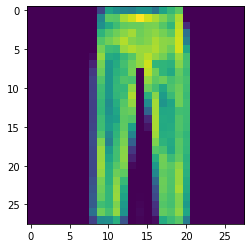

In [48]:
plt.imshow(EXAMPLES[EXAMPLE_IMAGE].reshape((28,28)))

In [49]:
f1 = activation_model.predict(EXAMPLES)

In [50]:
print(len(f1))
print(len(f1[0]))
f1[0][0][:,:,0].shape

7
2


(26, 26)

In [34]:
def show_conv_layers(layer_outputs):
    for layer in range(0, 4, 2):
        fig = plt.figure(figsize=(10, 10))
        for img, i in enumerate(layer_outputs[layer]):
            for filter_index in range(64):
                fig.add_subplot(8, 16, filter_index+1).imshow(img[:, :, filter_index])
        plt.show()

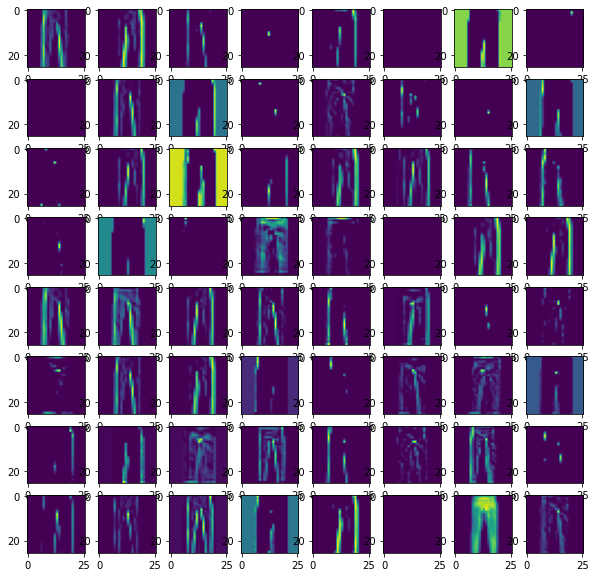

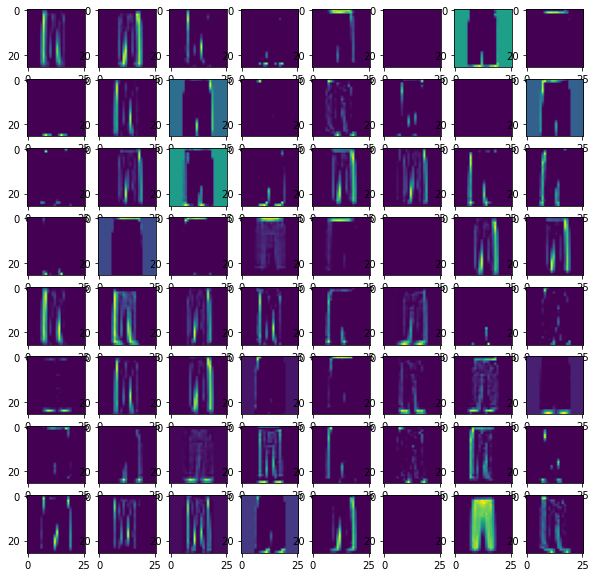

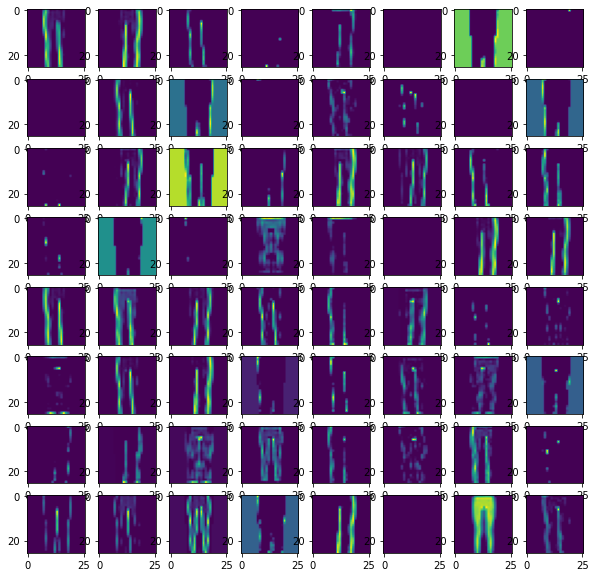

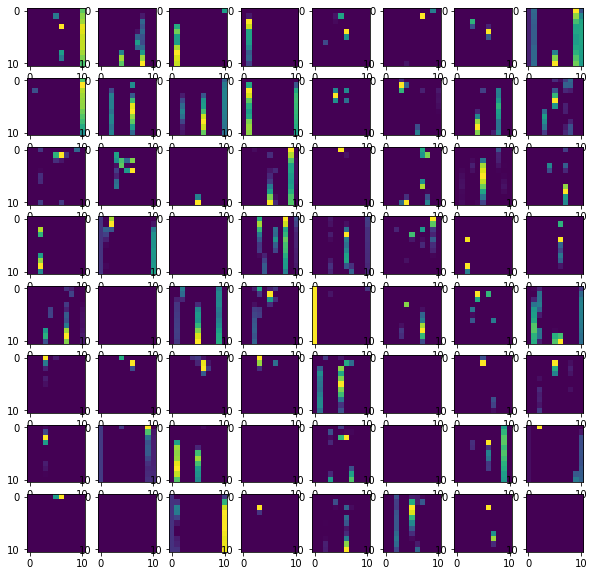

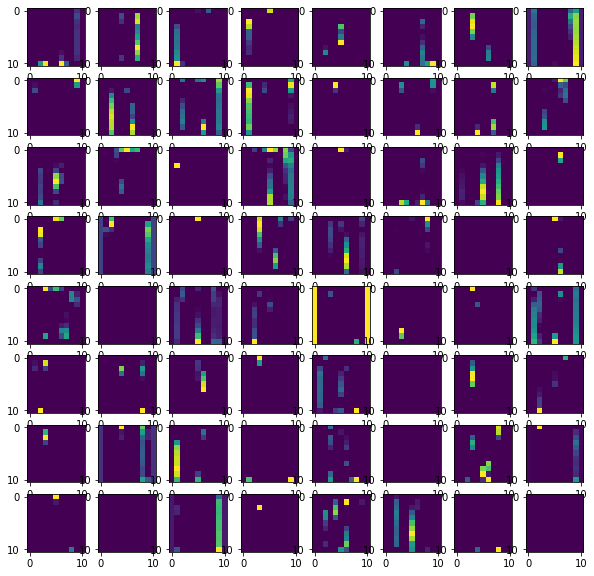

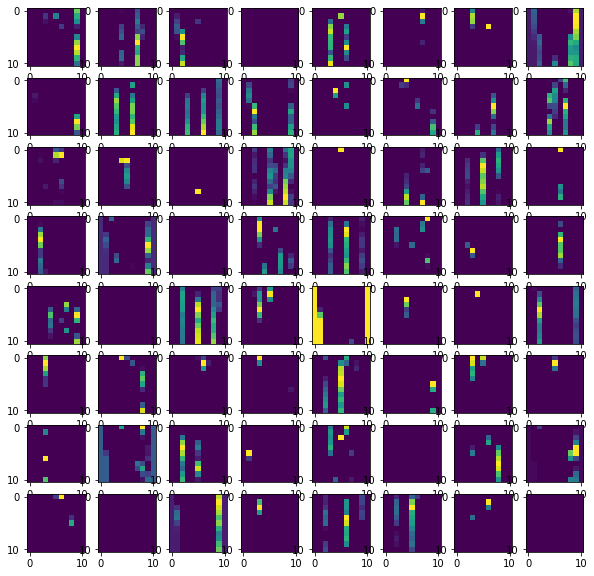

In [35]:
show_conv_layers(f1)

In [96]:
f1 = activation_model.predict(EXAMPLES[2:])

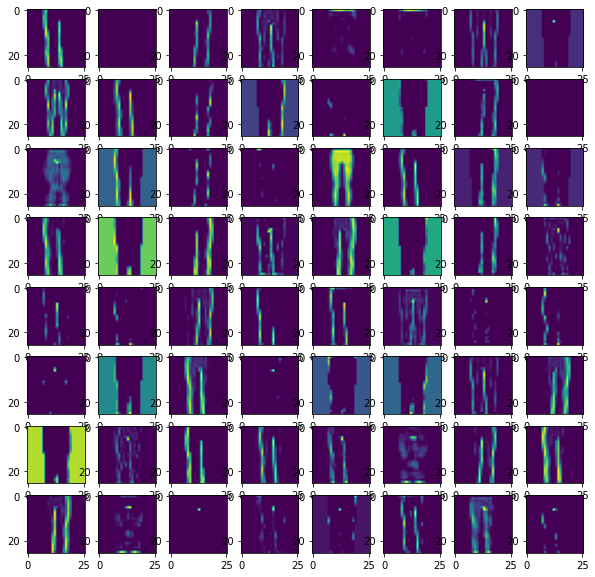

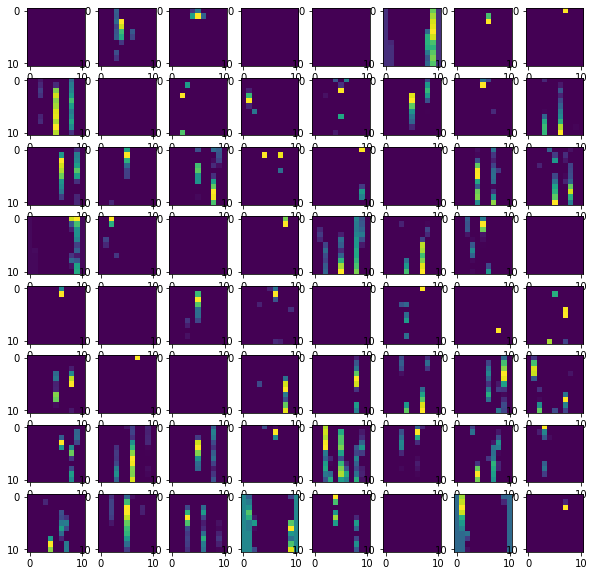

In [97]:
show_conv_layers(f1)

We can see here that similar feature maps have been conceived by the conv net for similat images. Shows that whatever the conv net is trying to learn, it will classify the above images as same.

In [110]:
model.predict(EXAMPLES[0:]).argmax()

1

In [109]:
model.predict(EXAMPLES[1:]).argmax()

11

In [108]:
model.predict(EXAMPLES[2:]).argmax()

1